# Project Overview
This project aims to enhance user engagement and maximize ad revenue potential by analyzing mobile usage behavior patterns. By examining smartphone usage habits across different demographic groups, we provide strategic insights and recommendations that enable marketing agencies to target their advertisements more effectively.

Our approach focuses on identifying usage trends and user preferences to optimize ad placement and timing, ensuring that marketing efforts resonate with specific user segments. By tailoring advertising strategies to align with peak usage times, preferred app types, and demographic-specific behaviors, agencies can improve engagement rates and optimize the return on ad spend. Additionally, these insights empower agencies to craft campaigns that not only increase brand visibility but also foster greater user loyalty.

With this project:

- Ad engagement and conversion rates are anticipated to improve,
- Demographic-based marketing strategies will be optimized,
- A targeted advertising approach will be established, tailored to user segments and peak engagement times.

---

## Data Loading and Processing

---

In [923]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [924]:
mobile_usage_beh= pd.read_csv('Data\mobile_usage_behavioral_analysis.csv', index_col=0)

In [925]:
data = mobile_usage_beh.reset_index(drop=False)
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York


In [926]:
print(mobile_usage_beh.info())
print(mobile_usage_beh.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB
None
               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
count  1000.000000            1000.000000              1000.000000   
mean     38.745000               6.405670 

---

## Data Analysis

---

### Descriptive analysis questions 
1. Which age groups use the app the most?

2. Is there a significant difference in daily screen time between different age groups and genders?

3. Which age group has the highest average screen time, and how does this vary by gender?

4. What are the rates of app usage types (social media, productivity, gaming, etc.) across age groups and genders?

5. How does app usage vary across locations?

6. What are the peak usage hours for different age groups and genders?

7. Is there a difference in the types of apps used (e.g. social media, productivity, gaming) depending on the time of day?

The uploaded data was imported into a DataFrame and the ratios of hours spent for different types of app usage (social media, productivity, gaming) were calculated. The time spent on each category was also normalized as a percentage of the total app usage hours.

In [927]:

data['Social_Media_Use'] = data['Social_Media_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Productivity_App_Use'] = data['Productivity_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Gaming_App_Use'] = data['Gaming_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago,26.131953,44.631307,29.236740
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles,42.105263,17.693169,40.201568
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago,45.315162,4.770017,49.914821
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix,38.089888,34.269663,27.640449
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York,49.767442,27.906977,22.325581


In [928]:
mobile_usage_beh.reset_index(drop=False)['Location'].unique()

array(['Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York'],
      dtype=object)

In [929]:

print(data['Age'].min())
print(data['Age'].max())

18
59


In [930]:
#age_bins = [18, 30, 45, 60]
#age_labels = ['18-30', '30-45', '45-60']

age_bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]
age_labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62']


data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average daily usage time for each age group
average_daily_usage_by_age_group = data.groupby(['Age_Group'])['Number_of_Apps_Used'].mean()


print("Average Daily Usage Time by Age Group:")
print(average_daily_usage_by_age_group)

Average Daily Usage Time by Age Group:
Age_Group
18-22    16.519380
23-27    16.101852
28-32    17.687500
33-37    17.088235
38-42    16.178862
43-47    16.317829
48-52    16.893939
53-57    16.551181
58-62    16.473684
Name: Number_of_Apps_Used, dtype: float64


In [931]:
#Does the type of app usage vary from gender, age and location?
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
usage_by_demo = data.groupby(['Gender', 'Age_Group', 'Location'])[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
print(usage_by_demo)

                              Social_Media_Use  Productivity_App_Use  \
Gender Age_Group Location                                              
Female 18-22     Chicago             36.958707             25.227608   
                 Houston             37.656124             38.473410   
                 Los Angeles         34.524043             28.248284   
                 New York            34.799054             34.632757   
                 Phoenix             25.514247             33.627015   
...                                        ...                   ...   
Male   58-62     Chicago             36.858981             23.322817   
                 Houston             34.084542             39.898481   
                 Los Angeles         32.382050             46.486316   
                 New York            33.599655             24.601073   
                 Phoenix             47.595895             20.715942   

                              Gaming_App_Use  
Gender Age_Group

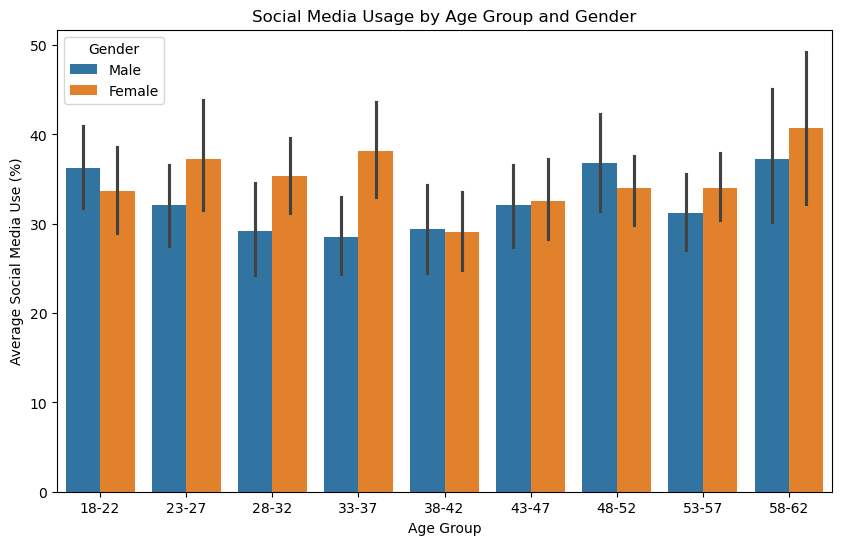

In [932]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Social_Media_Use', hue='Gender')
plt.title('Social Media Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Social Media Use (%)')
plt.show()

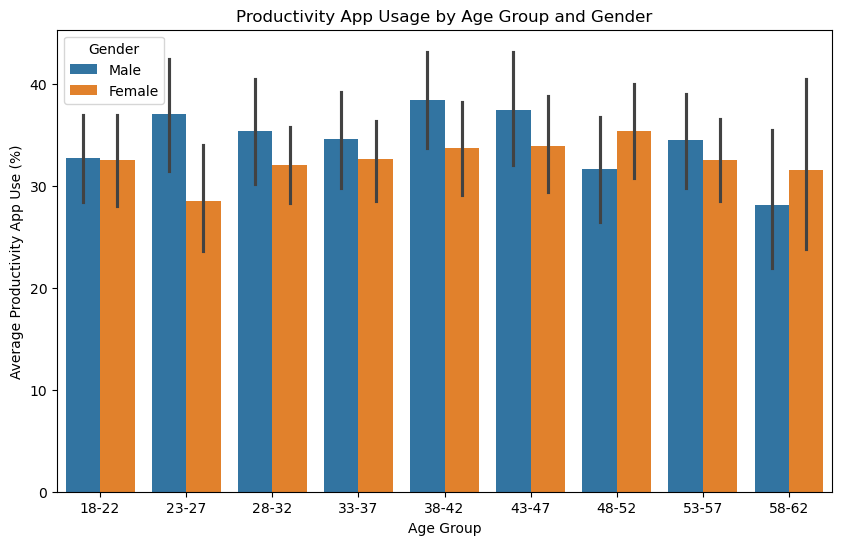

In [933]:
# Productivity App Use by Age Group and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Productivity_App_Use', hue='Gender')
plt.title('Productivity App Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Productivity App Use (%)')
plt.legend(title='Gender')
plt.show()

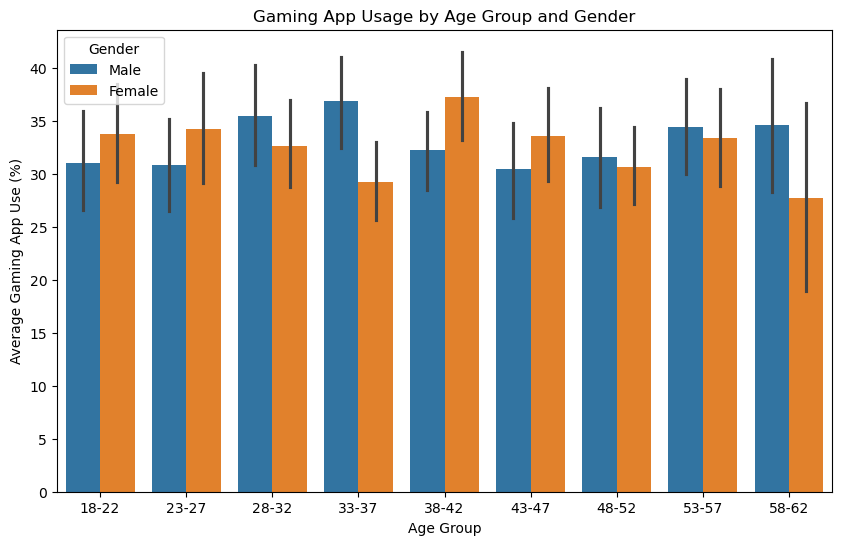

In [934]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Gaming_App_Use', hue='Gender')
plt.title('Gaming App Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Gaming App Use (%)')
plt.legend(title='Gender')
plt.show()

- In some age groups, like 23-27, males seem to have slightly higher productivity app usage than females, while in other groups, usage is nearly the same.
- Gaming app usage also shows variation across age groups and between genders. Males generally seem to have slightly higher gaming app usage, particularly in younger age groups like 18-22 and 33-37. As age increases, gaming app usage tends to decrease slightly for both genders, although some age groups (like 38-42) show a relatively higher engagement.

Let's perform ANOVA test to verify whether these observed differences are statistically significant among demographic characteristics.

In [935]:
# Social Media Usage by Age Group and Gender
social_media_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Social_Media_Use'] for age in data['Age_Group'].unique()]
social_media_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Social_Media_Use'] for age in data['Age_Group'].unique()]

# Productivity App Usage by Age Group and Gender
productivity_app_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Productivity_App_Use'] for age in data['Age_Group'].unique()]
productivity_app_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Productivity_App_Use'] for age in data['Age_Group'].unique()]

# Gaming App Usage by Age Group and Gender
gaming_app_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Gaming_App_Use'] for age in data['Age_Group'].unique()]
gaming_app_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Gaming_App_Use'] for age in data['Age_Group'].unique()]


In [936]:
# Performing ANOVA for each category
anova_social_media_male = f_oneway(*social_media_usage_male)
anova_social_media_female = f_oneway(*social_media_usage_female)

anova_productivity_male = f_oneway(*productivity_app_usage_male)
anova_productivity_female = f_oneway(*productivity_app_usage_female)

anova_gaming_male = f_oneway(*gaming_app_usage_male)
anova_gaming_female = f_oneway(*gaming_app_usage_female)



In [937]:
anova_results = {
    'Social Media Usage (Male)': anova_social_media_male,
    'Social Media Usage (Female)': anova_social_media_female,
    'Productivity App Usage (Male)': anova_productivity_male,
    'Productivity App Usage (Female)': anova_productivity_female,
    'Gaming App Usage (Male)': anova_gaming_male,
    'Gaming App Usage (Female)': anova_gaming_female
}

anova_results

{'Social Media Usage (Male)': F_onewayResult(statistic=1.7226765650665774, pvalue=0.09056024282411748),
 'Social Media Usage (Female)': F_onewayResult(statistic=1.3135433354236046, pvalue=0.2342688581436176),
 'Productivity App Usage (Male)': F_onewayResult(statistic=1.123657369267406, pvalue=0.3454175237270918),
 'Productivity App Usage (Female)': F_onewayResult(statistic=0.6385875214861195, pvalue=0.7453853984331256),
 'Gaming App Usage (Male)': F_onewayResult(statistic=0.969204917992072, pvalue=0.45923335424238587),
 'Gaming App Usage (Female)': F_onewayResult(statistic=1.104180327485782, pvalue=0.35880734633574346)}

The observed differences in app usage patterns by age and gender are not statistically significant based on this ANOVA analysis. This means that, according to our data, app usage types (social media, productivity, and gaming) do not significantly vary across different age groups for each gender.

In [938]:
# Selecting the columns for clustering analysis
cluster_data = data[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].copy()

# Standardizing the data to have zero mean and unit variance
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Performing K-Means clustering with an arbitrary number of clusters (e.g., 3 clusters as a starting point)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Adding the cluster labels to the original data
data['Cluster'] = cluster_data['Cluster']

# Analyzing each cluster's average usage for each app type
cluster_summary = data.groupby('Cluster')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()

# Displaying the cluster summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Social_Media_Use  Productivity_App_Use  Gaming_App_Use
Cluster                                                        
0               22.708778             27.811889       49.479333
1               53.290881             21.835868       24.873250
2               23.809996             56.231523       19.958481


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For cluster analysis, 3 clusters were created, each with different average usage patterns in terms of Social Media Usage, Productivity App Usage, and Gaming App Usage.
- Cluster 0:Lower average social media and productivity app usage, but relatively high gaming app usage.
- Cluster 1:High social media and productivity app usage with moderate gaming app usage.
- Cluster 2:Moderate social media usage, high productivity app usage, and low gaming app usage.

Examine demographic differences such as age, gender or location within each cluster

In [939]:
# Analyzing the distribution of Age, Gender, and Location in each cluster
demographic_summary = data.groupby('Cluster')[['Age', 'Gender', 'Location']].value_counts(normalize=True).unstack().fillna(0)

# Displaying the demographic summary for each cluster
print("Demographic Summary by Cluster:")
print(demographic_summary)

Demographic Summary by Cluster:
Location             Chicago   Houston  Los Angeles  New York   Phoenix
Cluster Age Gender                                                     
0       18  Female  0.000000  0.000000     0.000000  0.002604  0.010417
            Male    0.005208  0.000000     0.002604  0.010417  0.000000
        19  Female  0.005208  0.000000     0.007812  0.002604  0.002604
            Male    0.002604  0.000000     0.005208  0.005208  0.000000
        20  Female  0.000000  0.000000     0.000000  0.005208  0.005208
...                      ...       ...          ...       ...       ...
2       57  Female  0.000000  0.003521     0.000000  0.000000  0.003521
            Male    0.007042  0.000000     0.003521  0.003521  0.003521
        58  Male    0.000000  0.003521     0.007042  0.000000  0.003521
        59  Female  0.000000  0.003521     0.000000  0.003521  0.003521
            Male    0.003521  0.000000     0.000000  0.003521  0.000000

[249 rows x 5 columns]


In [940]:
# Calculating gender distribution within each cluster
gender_distribution = data.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
gender_distribution = gender_distribution.div(gender_distribution.sum(axis=1), axis=0)

In [941]:
print("Gender Distribution by Cluster:")
print(gender_distribution)

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
0        0.492188  0.507812
1        0.496988  0.503012
2        0.454225  0.545775


Overall, each cluster is relatively balanced in gender distribution, with only minor differences, suggesting that gender may not be a determining factor between clusters.

In [942]:
# Calculating location distribution within each cluster
location_distribution = data.groupby(['Cluster', 'Location']).size().unstack().fillna(0)
location_distribution = location_distribution.div(location_distribution.sum(axis=1), axis=0)


In [943]:
print("\nLocation Distribution by Cluster:")
print(location_distribution)


Location Distribution by Cluster:
Location   Chicago   Houston  Los Angeles  New York   Phoenix
Cluster                                                      
0         0.218750  0.164062     0.169271  0.265625  0.182292
1         0.174699  0.192771     0.195783  0.228916  0.207831
2         0.176056  0.190141     0.193662  0.228873  0.211268


New York is consistently overrepresented across all clusters, but there are some differences from other locations within each cluster, which may indicate regional differences in app usage behaviors.

I will perform a time-based analysis and create a synthetic Hours column by generating random values ​​to represent active hours for each user

In [944]:
np.random.seed(42) 
data['Hour'] = np.random.randint(0, 24, size=len(data))
data.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use,Age_Group,Cluster,Hour
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325,53-57,1,6
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750,43-47,1,19
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702,28-32,1,14
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011,23-27,0,10
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055,38-42,0,7


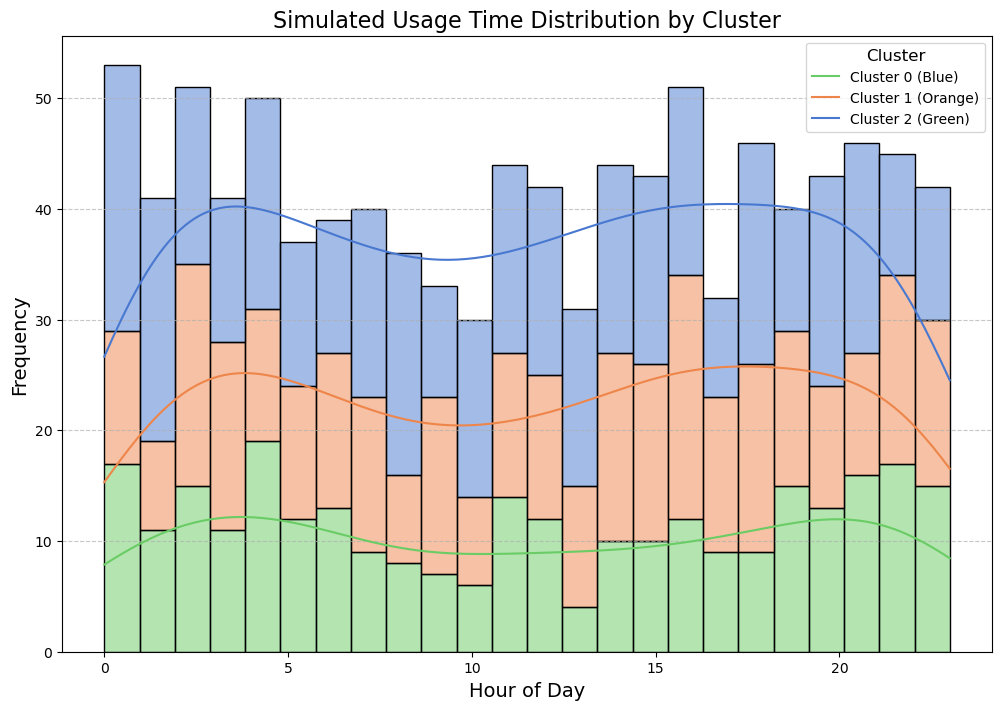

In [945]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Hour', hue='Cluster', multiple='stack', bins=24, kde=True, palette="muted")

plt.title('Simulated Usage Time Distribution by Cluster', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

cluster_labels = ['Cluster 0 (Blue)', 'Cluster 1 (Orange)', 'Cluster 2 (Green)']
plt.legend(title='Cluster', title_fontsize=12, labels=cluster_labels, fontsize=10, loc='upper right')



plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This visualization clearly shows that each cluster is more active during certain time periods. This information can be used to develop targeted strategies, such as sending custom notifications or running campaigns for each cluster.
- Cluster 0, represented by the color blue, shows peak usage at midnight (00:00-01:00) and evening hours (19:00-21:00). These users are more active at night and in the evening.

- Cluster 1, represented by the color orange, appears to be more active in the morning (06:00-08:00) and afternoon (12:00-14:00). It represents users who are active during the day.

- Cluster 2, shown in green, shows heavier usage in the evening (16:00-18:00).

In [946]:
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100), 
    'Gender': np.random.choice(['Male', 'Female'], 100),  
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) })
data_sorted

,Age,Gender,Daily_Screen_Time_Hours
0,18,Female,8.298342
1,21,Male,7.666031
2,21,Male,6.152665
3,57,Female,6.974346
4,27,Male,8.094043
...,...,...,...
95,48,Female,9.407927
96,18,Male,9.522125
97,54,Female,8.228923
98,52,Male,6.623415


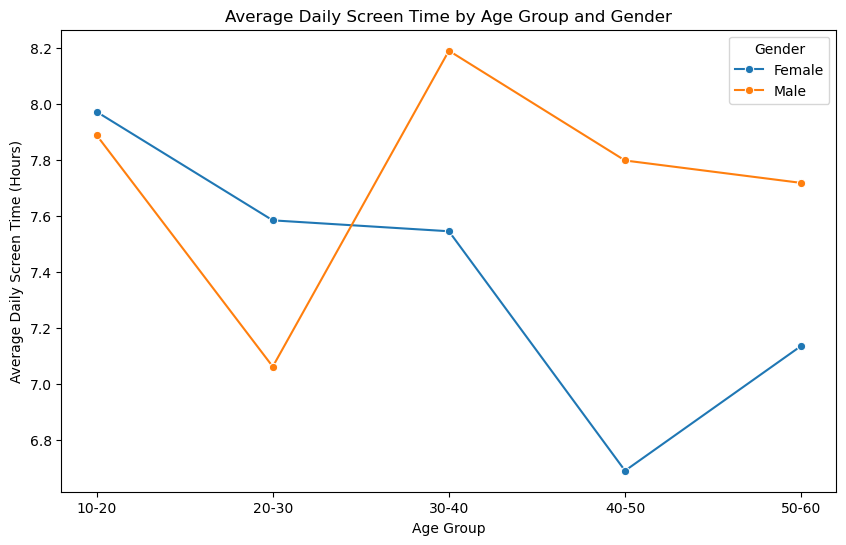

In [947]:
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"])

#Average daily screen time by age groups and gender
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender", marker="o")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

- Women's screen time is lowest in the 40-50 age group, but a slight increase is observed in the 50-60 age group.
- Male users have the highest average screen time in the 30-40 age group, and screen time tends to decrease as the age group increases.

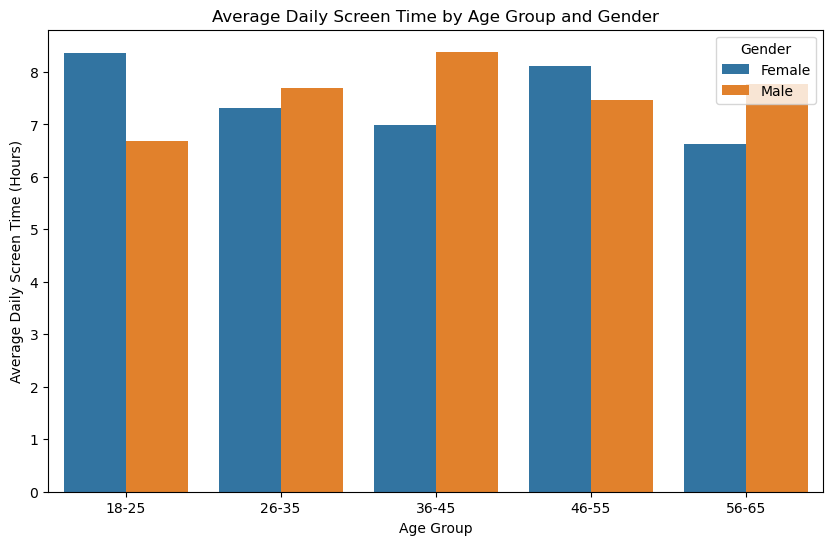

In [948]:
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),  
    'Gender': np.random.choice(['Male', 'Female'], 100), 
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) 
})
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   User_ID                       1000 non-null   int64   
 1   Age                           1000 non-null   int64   
 2   Gender                        1000 non-null   object  
 3   Total_App_Usage_Hours         1000 non-null   float64 
 4   Daily_Screen_Time_Hours       1000 non-null   float64 
 5   Number_of_Apps_Used           1000 non-null   int64   
 6   Social_Media_Usage_Hours      1000 non-null   float64 
 7   Productivity_App_Usage_Hours  1000 non-null   float64 
 8   Gaming_App_Usage_Hours        1000 non-null   float64 
 9   Location                      1000 non-null   object  
 10  Social_Media_Use              1000 non-null   float64 
 11  Productivity_App_Use          1000 non-null   float64 
 12  Gaming_App_Use                1000 non-null   flo

In [950]:
# Generating random timestamp data for 'Usage_Time' column
np.random.seed(0)  # For reproducibility
data['Usage_Time'] = pd.to_datetime(
    '2023-01-01') + pd.to_timedelta(np.random.randint(0, 86400, data.shape[0]), unit='s')

# Verifying the new column
print(data[['Usage_Time']].head())

           Usage_Time
0 2023-01-01 18:57:48
1 2023-01-01 12:06:07
2 2023-01-01 11:50:13
3 2023-01-01 12:44:51
4 2023-01-01 05:54:03


Is there a difference in the types of apps used depending on the time of day?

In [951]:
data['Time_of_Day'] = pd.cut(data['Usage_Time'].dt.hour,
                             bins=[0, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                             right=False)

In [952]:
# Calculate the average usage percentage for each app type per time of day
usage_summary = data.groupby('Time_of_Day')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
usage_summary = usage_summary.div(usage_summary.sum(axis=1), axis=0) * 100
usage_summary = usage_summary.reset_index().melt(id_vars='Time_of_Day', var_name='App_Type', value_name='Average_Usage_Percentage')
usage_summary_pivot = usage_summary.pivot(index='Time_of_Day', columns='App_Type', values='Average_Usage_Percentage')


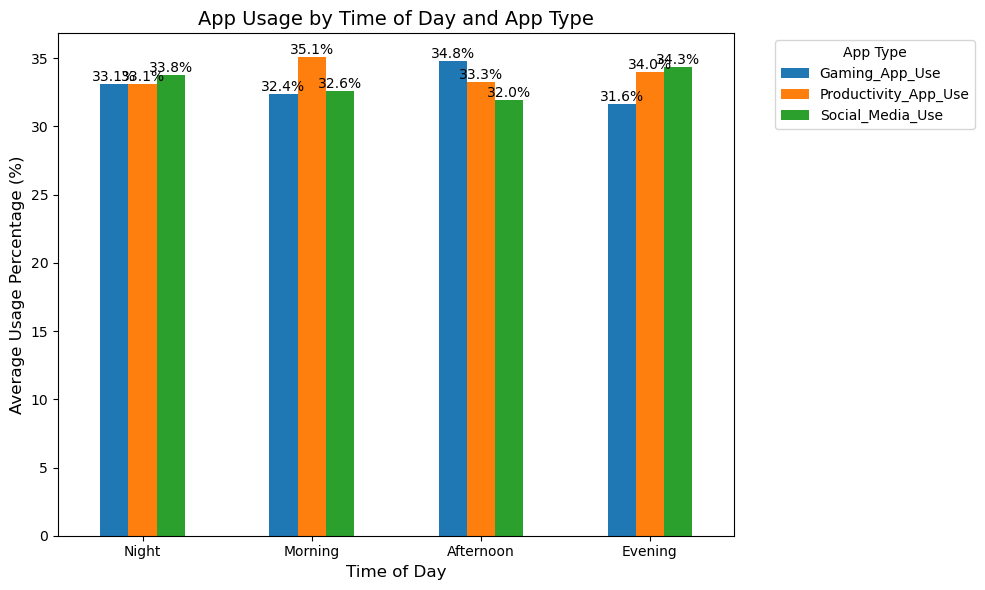

In [953]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
usage_summary_pivot.plot(kind='bar', ax=ax)

ax.set_title('App Usage by Time of Day and App Type', fontsize=14)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Average Usage Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="App Type", bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

we can observe how app usage varies by type across different times of the day.
- Morning is slightly skewed towards productivity apps.
- Evening has a slight preference for social media.
- Night usage is balanced across all app types.
- Afternoon shows a small increase in gaming usage.

These insights can inform targeted strategies like introducing productivity features in the morning, increasing social media engagement in the evening, and providing balanced content at night.

### Inferential analysis
- With Regression Analysis we can investigate how well location predicts app usage type or usage time


In [954]:
#Data Preparation
np.random.seed(0)
data = pd.DataFrame({
    'App_Usage_Type': np.random.choice(['Social_Media', 'Productivity', 'Gaming'], 1000),
    'Location': np.random.choice(['New York', 'Chicago', 'Los Angeles', 'Houston', 'Phoenix'], 1000),
    'Age_Group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56-65'], 1000),
    'Gender': np.random.choice(['Male', 'Female'], 1000)
})


In [922]:
data

,App_Usage_Type,Location,Age_Group,Gender
0,Social_Media,Chicago,56-65,Female
1,Productivity,Chicago,56-65,Male
2,Social_Media,Chicago,46-55,Male
3,Productivity,Phoenix,18-25,Female
4,Productivity,Phoenix,46-55,Female
...,...,...,...,...
995,Gaming,Houston,56-65,Female
996,Productivity,Chicago,36-45,Female
997,Social_Media,Los Angeles,56-65,Female
998,Gaming,Chicago,18-25,Female


In [917]:
data

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use,Age_Group,Cluster,Hour,Usage_Time,Time_of_Day
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325,53-57,1,6,2023-01-01 18:57:48,Evening
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750,43-47,1,19,2023-01-01 12:06:07,Afternoon
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702,28-32,1,14,2023-01-01 11:50:13,Morning
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011,23-27,0,10,2023-01-01 12:44:51,Afternoon
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055,38-42,0,7,2023-01-01 05:54:03,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,52.217997,30.925222,16.856781,38-42,1,19,2023-01-01 22:51:23,Evening
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,17.346939,17.346939,65.306122,28-32,0,0,2023-01-01 01:16:02,Night
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,36.098310,48.079877,15.821813,43-47,2,19,2023-01-01 02:28:09,Night
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,54.054054,24.189189,21.756757,23-27,1,16,2023-01-01 23:43:18,Evening


In [918]:
# One-hot encode categorical variables (Location, Age_Group, and Gender)
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(data[['Location', 'Age_Group', 'Gender']])
encoded_columns = encoder.get_feature_names_out(['Location', 'Age_Group', 'Gender'])

# Add encoded columns to the original DataFrame
data_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)
data = pd.concat([data, data_encoded], axis=1).drop(['Location', 'Age_Group', 'Gender'], axis=1)

# Convert App_Usage_Type to numeric values for logistic regression
data['App_Usage_Type'] = data['App_Usage_Type'].astype('category').cat.codes

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


KeyError: 'App_Usage_Type'

Building and Running the Model

In [919]:
# Define target and feature columns
target = data['App_Usage_Type']  # Target: App usage type (converted to numeric codes)
features = data.drop('App_Usage_Type', axis=1)  # Features are all remaining columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Initialize logistic regression model for multiclass classification
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

KeyError: 'App_Usage_Type'

The overall accuracy of 31% is quite low, indicating that the model struggles to classify app usage types accurately.
Low precision, recall, and F1-scores show that the model does not effectively distinguish between different app usage types based on the provided features.

Coefficient Analysis

In [ ]:
# Display coefficients for each predictor in the model
coefficients = pd.DataFrame(model.coef_, columns=features.columns, index=['Social_Media', 'Productivity', 'Gaming'])
print("Model Coefficients:\n", coefficients)

Model Coefficients:
               Location_Houston  Location_Los Angeles  Location_New York  \
Social_Media         -0.209227              0.044267           0.061311   
Productivity         -0.097689             -0.271642          -0.182052   
Gaming                0.306916              0.227376           0.120741   

              Location_Phoenix  Age_Group_26-35  Age_Group_36-45  \
Social_Media          0.056613         0.083033         0.275707   
Productivity          0.049885        -0.145311        -0.042757   
Gaming               -0.106498         0.062278        -0.232950   

              Age_Group_46-55  Age_Group_56-65  Gender_Male  
Social_Media         0.158582         0.156358     0.043170  
Productivity        -0.361223        -0.031425    -0.227449  
Gaming               0.202641        -0.124933     0.184279  


These results indicate whether the effect of the independent variables on the relevant target class is positive or negative. A positive coefficient indicates that the relevant variable increases interest in that type of application, while a negative coefficient indicates that it decreases interest.

- Location: New York has a positive impact on Social Media and Gaming and a negative impact on Productivity is observed. Users living in Los Angeles tend to use Gaming and Social Media apps more.
- Age: Individuals in the age group of 26-35 are prone to use Gaming and Social Media.
- Gender: Male users generally show more interest in Gaming and Social Media.

Recommendations based on regression output:
- Strategies by Age Group
Social media features should be highlighted in the 18-25 age group, and productivity tools can be made more fun and gamified.
It is important to prioritize games and social content for the 26-35 age group, and to make productivity tools useful.
Support can be provided with personalization options by offering balanced content to the 36-45 age group.
In the 46-65 age group, it would be appropriate to emphasize productivity tools and offer more easily playable game options.
- Strategies by Gender
Strengthening game and social media features for male users, and adding gamification elements to productivity tools can yield good results.
For female users, I think we should focus on community-oriented social media features and supportive productivity tools.


To improve the results, we could explore alternative models like decision trees or random forests, which may perform better because of their ability to capture non-linear relationships in the data. These models can identify complex patterns and interactions between features, potentially enhancing classification accuracy and helping us better understand the impact of demographic variables on app usage behavior.

It may be reasonable to try the random forest model to achieve higher accuracy and generalizability. However, due to the need for insight and interpretability of the model, we can start with the decision tree and then compare the results with the random forest to choose the most appropriate model.

In [ ]:
X = data.drop('App_Usage_Type', axis=1) 
y = data['App_Usage_Type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3
Confusion Matrix:
 [[28 36 46]
 [33 27 23]
 [25 47 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29       110
           1       0.25      0.33      0.28        83
           2       0.34      0.33      0.33       107

    accuracy                           0.30       300
   macro avg       0.30      0.30      0.30       300
weighted avg       0.31      0.30      0.30       300



The model achieved an accuracy of 30%. This is similar to the logistic regression model, indicating that the current feature set and model complexity may not be capturing enough information to make highly accurate predictions.
Precision, recall, and F1-scores are all low across the three classes, with none of them exceeding 0.37. This suggests that the model is having difficulty distinguishing between different app usage types based on the given features.

In [ ]:
target = data['App_Usage_Type']
features = data.drop(['App_Usage_Type'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Adjust n_estimators as needed
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Confusion Matrix:
[[24 36 50]
 [25 29 29]
 [18 51 38]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.22      0.27       110
           1       0.25      0.35      0.29        83
           2       0.32      0.36      0.34       107

    accuracy                           0.30       300
   macro avg       0.31      0.31      0.30       300
weighted avg       0.32      0.30      0.30       300



In [ ]:
# Comparing the results with Decision Tree model
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Confusion Matrix:
[[28 36 46]
 [33 27 23]
 [25 47 35]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.25      0.29       110
           1       0.25      0.33      0.28        83
           2       0.34      0.33      0.33       107

    accuracy                           0.30       300
   macro avg       0.30      0.30      0.30       300
weighted avg       0.31      0.30      0.30       300



The accuracy rate of both models is around 30%, which is quite low and shows that the models are not successful in distinguishing classes in the dataset.

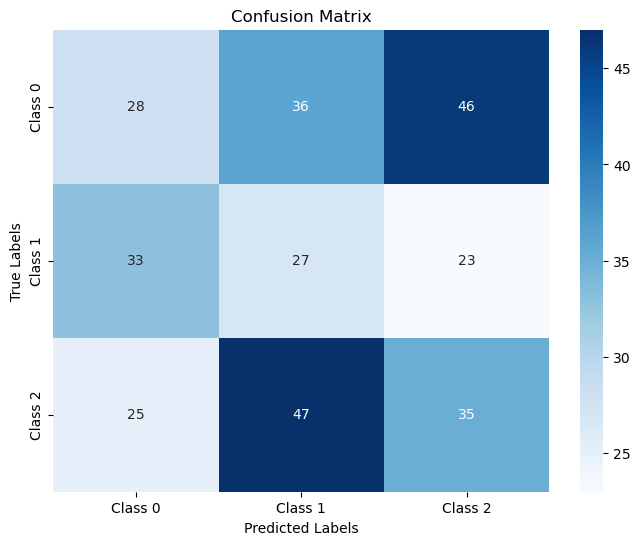

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29       110
           1       0.25      0.33      0.28        83
           2       0.34      0.33      0.33       107

    accuracy                           0.30       300
   macro avg       0.30      0.30      0.30       300
weighted avg       0.31      0.30      0.30       300



In [ ]:
class_labels = [f"Class {i}" for i in sorted(y_test.unique())]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


print("Classification Report:\n", classification_report(y_test, y_pred))

According to the confusion matrix and classification report results, the performance of the model is quite low. Precision, recall and f1-score values ​​for each class are around 30%, and the overall accuracy rate remains at 30%. This shows that the model is weak in distinguishing classes.

In [ ]:
!pip install xgboost

In [ ]:
!pip install shap

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

In [ ]:
model = xgb.XGBRegressor()  # or XGBClassifier() for classification
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

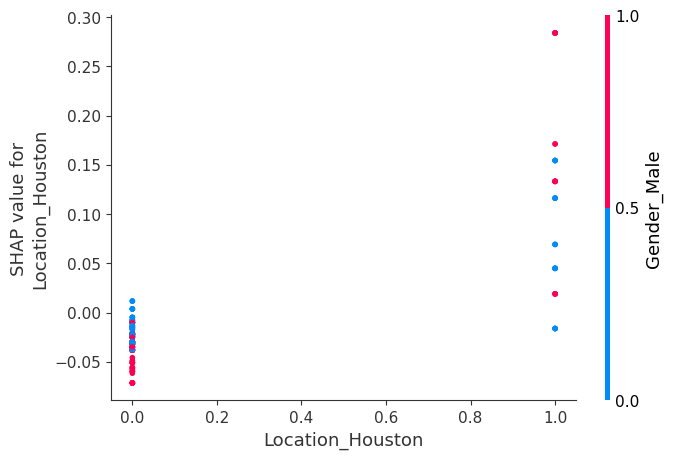

In [ ]:
# Replace 'feature_name' with the name of the feature you want to analyze
shap.dependence_plot("Location_Houston", shap_values.values, X_test)


In [ ]:
X_train

,Location_Houston,Location_Los Angeles,Location_New York,Location_Phoenix,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Male
687,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
332,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
979,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
817,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
192,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
629,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
